In [1]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
original_tf_data = pd.read_csv("first_upload_copy.csv")

df = pd.DataFrame(original_tf_data, columns=['ID Number','Gender','Grade Level','Season','400 Meters','800 Meters','1500 Meters','1600 Meters'])
columnsTitles = ['ID Number','Gender','Grade Level','Season','400 Meters','800 Meters','1500 Meters','1600 Meters']
original_tf_df = df.reindex(columns=columnsTitles)

original_tf_df
copy_df = original_tf_df.copy()

In [3]:
copy_df

,ID Number,Gender,Grade Level,Season,400 Meters,800 Meters,1500 Meters,1600 Meters
0,21,M,12th Grade,2007 Outdoor Season,57.74,NaN,NaN,NaN
1,21,M,12th Grade,2007 Outdoor Season,57.34c,NaN,NaN,NaN
2,21,M,12th Grade,2007 Outdoor Season,56.14c,NaN,NaN,NaN
3,21,M,12th Grade,2007 Outdoor Season,57.2h,NaN,NaN,NaN
4,21,M,12th Grade,2007 Outdoor Season,58.8h,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
41784,19989,M,12th Grade,2005 Outdoor Season,54.14c,NaN,NaN,NaN
41785,19991,M,12th Grade,2005 Outdoor Season,NaN,3:27.3h,NaN,NaN
41786,19991,M,12th Grade,2005 Outdoor Season,NaN,3:14.3h,NaN,NaN
41787,19991,M,12th Grade,2005 Outdoor Season,NaN,3:21.5h,NaN,NaN


In [4]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41789 entries, 0 to 41788
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID Number    41789 non-null  int64 
 1   Gender       41789 non-null  object
 2   Grade Level  41789 non-null  object
 3   Season       41789 non-null  object
 4   400 Meters   14362 non-null  object
 5   800 Meters   12910 non-null  object
 6   1500 Meters  14315 non-null  object
 7   1600 Meters  200 non-null    object
dtypes: int64(1), object(7)
memory usage: 2.6+ MB


In [5]:
# this is the laters version of these def I am running

null_times = {np.nan,'nan','DNR','nt','no time','FS','DQ','NT','SCR','DNS','DNF','na','MB', 'shot 29.9', 'NS', '?'}

def time_convert(x):
    if (str(x)[-1]=='c') or (str(x)[-1]=='h'):
        x = str(x)[:-1] 
    x_split = str(x).split(':')
    if not '.' in x_split[-1]:
        x = str(x) + '.00'
    #print(x)
    ##Annoying edge cases
    if (x_split[-1] == '60.00') or (x_split[-1] =='60.0') or (x_split[-1] == '28/0'):
      #print('here')
      return np.nan

    if (x[-1] == 'a'):
      #print('here')
      return(np.nan)

    if (str(x) == '57.4**'):
      #print(x)
      return(np.nan)

    if len(x_split)==1:
        t = datetime.datetime.strptime(x, '%S.%f').time()
        return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)

    if len(x_split)==2:
      t = datetime.datetime.strptime(x, '%M:%S.%f').time()
      return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)

    if len(x_split)==3:
        t = datetime.datetime.strptime(x, '%H:%M:%S.%f').time()
        return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)
  

In [6]:
#One dataframe for each event
#here we are doing the final filtering of these df's
#by using a list of wrongly input features, we can check if those values are in any 
#row of these 400m cols. if it is, it is filtered out using the '~'. 
#finally, convert time is applied to convert each input time to seconds. 

df_400 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '400 Meters']]
df_400 = df_400[~df_400['400 Meters'].isin(null_times)]
df_400['400 Meters'] = df_400['400 Meters'].apply(time_convert)

df_800 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '800 Meters']]
df_800 = df_800[~df_800['800 Meters'].isin(null_times)]
df_800['800 Meters'] = df_800['800 Meters'].apply(time_convert)

df_1500 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '1500 Meters']]
df_1500 = df_1500[~df_1500['1500 Meters'].isin(null_times)]
df_1500['1500 Meters'] = df_1500['1500 Meters'].apply(time_convert)

df_1600 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '1600 Meters']]
df_1600 = df_1600[~df_1600['1600 Meters'].isin(null_times)]

df_1600['1600 Meters'] = df_1600['1600 Meters'].apply(time_convert)

In [7]:
df_400.info()
#There is something wrong with these 15 out of 14k in how their times were reported
df_400[(df_400['400 Meters']>180) | (df_400['400 Meters']<40)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14223 entries, 0 to 41784
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    14223 non-null  int64  
 1   Gender       14223 non-null  object 
 2   Grade Level  14223 non-null  object 
 3   Season       14223 non-null  object 
 4   400 Meters   14188 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.7+ KB


,ID Number,Gender,Grade Level,Season,400 Meters
8570,3580,M,11th Grade,2005 Outdoor Season,3304.00
10159,4193,M,12th Grade,2006 Outdoor Season,3213.14
15147,6416,M,12th Grade,2005 Outdoor Season,3694.14
15543,6657,M,9th Grade,2004 Outdoor Season,3573.00
16189,6988,M,9th Grade,2004 Outdoor Season,3375.14
16190,6988,M,9th Grade,2004 Outdoor Season,3429.14
18396,8322,M,10th Grade,2004 Outdoor Season,12.24
18974,8676,M,11th Grade,2005 Outdoor Season,5775.14
26686,12583,M,11th Grade,2007 Outdoor Season,3309.00
27009,12633,M,9th Grade,2005 Outdoor Season,3574.14


To analyze this dataset, we will be looking at how the runners have changed over time. Specifically we will answer the questions:
1. how has the pop of runners changed over the seasons.
2. how has their performance changed( min, max, mean) by season.
3. how does a 9th grader perform in a recent season vs one in the earliest season.



In [8]:
df_4 = df_400[(df_400['400 Meters']<75) & (df_400['400 Meters']>40)]
df_8 = df_800[(df_800['800 Meters']<250) & (df_800['800 Meters']>50)]
df_15= df_1500[(df_1500['1500 Meters']<500) & (df_1500['1500 Meters']>100)].dropna()

df_4.head()

,ID Number,Gender,Grade Level,Season,400 Meters
0,21,M,12th Grade,2007 Outdoor Season,57.74
1,21,M,12th Grade,2007 Outdoor Season,57.34
2,21,M,12th Grade,2007 Outdoor Season,56.14
3,21,M,12th Grade,2007 Outdoor Season,57.20
4,21,M,12th Grade,2007 Outdoor Season,58.80


In [9]:
print(df_4.shape)
print(df_8.shape)
print(df_15.shape)

(14110, 5)
(12763, 5)
(14170, 5)


In [10]:
def strip_format(data):
  data['Season'] = data['Season'].str.strip()
  return data


In [11]:
def filters(data):
    data = data[(data['Season'] >= '2004 Outdoor Season') & (data['Season'] <= '2007 Outdoor Season')]
    gl = data[data['Grade Level'] == '?'].index
    gl1 = data[data['Grade Level'] == '7th Grade'].index
    gl2 = data[data['Grade Level'] == '8th Grade'].index

    in1 = data[data['Season'] == '2004 Indoor Season'].index
    in2 = data[data['Season'] == '2005 Indoor Season'].index
    in3 = data[data['Season'] == '2006 Indoor Season'].index
    in4 = data[data['Season'] == '2007 Indoor Season'].index

    data.drop(index=(gl), inplace=True)
    data.drop(index=(gl1), inplace=True)
    data.drop(index=(gl2), inplace=True)

    data.drop(index=(in1), inplace=True)
    data.drop(index=(in2), inplace=True)
    data.drop(index=(in3), inplace=True)
    data.drop(index=(in4), inplace=True)

    return data


In [12]:
def show_population(data, col1, col2, col3):
  data = data.groupby([col1, col2])[col3].nunique()
  return data

In [13]:
def sort_group(data, col1, col2, col3):
  data = data.groupby([col1, col2]).agg({col3: 'mean'}).sort_values(by=[col2], ascending=True)
  return data

In [56]:
def number_runners(data, col1, col2):
  data = data.groupby([col1])[col2].nunique()
  return data

In [31]:
# create definition for a plot which focuses on season
def pivot_plot_season(data, col1, col2, col3, event):
  ax = data.pivot(index=col1, columns=col2, values=col3).plot(marker='o', figsize=(6,5))
  # set the axis labels and title
  ax.set_xlabel('Season')
  ax.set_title('Average {} Times by Season'.format(event))
  ax.set_ylabel('{} Time (S)'.format(event))

  #add a grid and use margins for x axis
  ax.grid(visible=True)
  ax.margins(x=0.05)

  #change the labels for the x axis
  tick_positions = [0, 1, 2, 3]
  tick_labels = ['2004', '2005', '2006', '2007']
  ax.set_xticks(tick_positions)
  ax.set_xticklabels(tick_labels)

  #change the legend
  ax.legend(['10th','11th','12th','9th'], title='Grade Level')

  #change style and show plot
  plt.style.use("fivethirtyeight")
  plt.show()

#######################
#######################
#######################

# create definition for a plot which focuses on grade level

def pivot_plot_grade(data, col1, col2, col3, event):
  ax = data.pivot(index=col1, columns=col2, values=col3).sort_values(by=[col1], key=lambda x: \
                                    x.map({'9th Grade': 0, '10th Grade': 1, '11th Grade': 2, '12th Grade': 3})).plot(marker='o', figsize=(6,5))
  # set the axis labels and title
  ax.set_xlabel('Grade Level')
  ax.set_title('Average {} Times by Grade Level'.format(event))
  ax.set_ylabel('{} Time (S)'.format(event))

  #add a grid and use margins for x axis
  ax.grid(visible=True)
  ax.margins(x=0.05)

  #change the labels for the x axis
  tick_positions = [0, 1, 2, 3]
  tick_labels = ['9th', '10th', '11th', '12th']
  ax.set_xticks(tick_positions)
  ax.set_xticklabels(tick_labels)

  #change the legend
  ax.legend(['2004', '2005', '2006', '2007'], title='Grade Level')

  #change style and show plot
  plt.style.use("fivethirtyeight")
  plt.show()

#######################
#######################
#######################

#define population plot

def plot_pop(data, col1, event):
  ax = data.plot(x=col1, y='Count', kind='bar', legend=False, color='lightsteelblue', edgecolor='black',figsize=(6,4))

  #create labels and title
  plt.xlabel('Outdoor Season')
  plt.ylabel('Count')
  plt.title('{} Track Participants by Season'.format(event))

  #change the labels for the x axis
  tick_positions = [0, 1, 2, 3]
  tick_labels = ['2004', '2005', '2006', '2007']
  ax.set_xticks(tick_positions)
  ax.set_xticklabels(tick_labels)

  #choose style and plot
  plt.style.use("fivethirtyeight")
  plt.show()

In [14]:
df_4 = strip_format(df_4)
df_8 = strip_format(df_8)
df_15 = strip_format(df_15)
#df_4.Season.unique()

<ipython-input-10-888d3003dd5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Season'] = data['Season'].str.strip()


array(['2007 Outdoor Season', '2006 Outdoor Season',
       '2005 Outdoor Season', '2004 Outdoor Season',
       '2003 Outdoor  Season', '2002 Outdoor  Season',
       '1998 Outdoor  Season', '1997 Outdoor  Season',
       '1996 Outdoor  Season', '2001 Outdoor  Season',
       '2008 Outdoor Season', '2011 Outdoor Season',
       '1995 Outdoor  Season', '2000 Outdoor  Season',
       '2009 Outdoor Season', '2004 Indoor Season', '2007 Indoor Season',
       '2006 Indoor Season', '2005 Indoor Season', '2010 Outdoor Season',
       '1999 Outdoor  Season', '2008 Indoor Season'], dtype=object)

From the output above we can see that the data is sparse. This tells us that all the columns will not be especially informative. But, we see that the outdoor season for years 2004, 2005, 2006 and maybe 2007 will give us accurate representation for each grade level. 

Because we are only looking at these 4 years, I will index for these seasons so the outputs are more clear.

In [15]:
pop_400 = show_population(df_4, 'Season', 'Grade Level', 'ID Number')
pop_800 = show_population(df_8, 'Season', 'Grade Level', 'ID Number')
pop_1500 = show_population(df_15, 'Season', 'Grade Level', 'ID Number')

print(pop_400)
print('\n -------------------------------- \n')
print(pop_800)
print('\n -------------------------------- \n')
print(pop_1500)


Season                Grade Level
1995 Outdoor  Season  11th Grade     2
1996 Outdoor  Season  10th Grade     2
                      11th Grade     1
                      9th Grade      2
1997 Outdoor  Season  10th Grade     2
                                    ..
2010 Outdoor Season   11th Grade     2
                      12th Grade     2
                      9th Grade      1
2011 Outdoor Season   12th Grade     1
                      ?              1
Name: ID Number, Length: 64, dtype: int64

 -------------------------------- 

Season                Grade Level
1995 Outdoor  Season  11th Grade       1
                      9th Grade        1
1996 Outdoor  Season  10th Grade       1
                      9th Grade        1
1997 Outdoor  Season  10th Grade       1
                      11th Grade       2
                      12th Grade       1
1998 Outdoor  Season  10th Grade       1
                      11th Grade       1
                      12th Grade       1
1999 Outdoor  

In [38]:
df_4 = filters(df_4)
df_8 = filters(df_8)
df_15 = filters(df_15)

print(df_4.Season.value_counts())
print('\n -------------------------------- \n')
print(df_8.Season.value_counts())
print('\n -------------------------------- \n')
print(df_15.Season.value_counts())

2005 Outdoor Season    4241
2006 Outdoor Season    3484
2004 Outdoor Season    2716
2007 Outdoor Season    2233
Name: Season, dtype: int64

 -------------------------------- 

2005 Outdoor Season    4210
2006 Outdoor Season    2955
2004 Outdoor Season    2789
2007 Outdoor Season    1679
Name: Season, dtype: int64

 -------------------------------- 

2005 Outdoor Season    4985
2006 Outdoor Season    3220
2004 Outdoor Season    3154
2007 Outdoor Season    1790
Name: Season, dtype: int64


In [17]:
pop_after4 = show_population(df_4, 'Season', 'Grade Level', 'ID Number')

pop_after4

Season               Grade Level
2004 Outdoor Season  10th Grade     237
                     11th Grade     234
                     12th Grade     261
                     9th Grade      220
2005 Outdoor Season  10th Grade     345
                     11th Grade     340
                     12th Grade     341
                     9th Grade      325
2006 Outdoor Season  10th Grade     272
                     11th Grade     308
                     12th Grade     293
                     9th Grade        9
2007 Outdoor Season  10th Grade       6
                     11th Grade     248
                     12th Grade     289
                     9th Grade        1
Name: ID Number, dtype: int64

In [18]:
group_400m = sort_group(df_4, 'Grade Level', 'Season', '400 Meters')
group_800m = sort_group(df_8, 'Grade Level', 'Season', '800 Meters')
group_1500m = sort_group(df_15, 'Grade Level', 'Season', '1500 Meters')

print(group_400m)
print('\n -------------------------------- \n')
print(group_800m)
print('\n -------------------------------- \n')
print(group_1500m)

                                 400 Meters
Grade Level Season                         
10th Grade  2004 Outdoor Season   58.427187
11th Grade  2004 Outdoor Season   57.001910
12th Grade  2004 Outdoor Season   55.064268
9th Grade   2004 Outdoor Season   60.165772
10th Grade  2005 Outdoor Season   58.155121
11th Grade  2005 Outdoor Season   57.188247
12th Grade  2005 Outdoor Season   55.906589
9th Grade   2005 Outdoor Season   60.440910
10th Grade  2006 Outdoor Season   58.197120
11th Grade  2006 Outdoor Season   56.553233
12th Grade  2006 Outdoor Season   55.134581
9th Grade   2006 Outdoor Season   62.413947
10th Grade  2007 Outdoor Season   60.096818
11th Grade  2007 Outdoor Season   56.351720
12th Grade  2007 Outdoor Season   55.152452
9th Grade   2007 Outdoor Season   60.506667

 -------------------------------- 

                                 800 Meters
Grade Level Season                         
10th Grade  2004 Outdoor Season  141.551069
11th Grade  2004 Outdoor Season  137.44

In [19]:
group_400m = group_400m.reset_index()
group_800m = group_800m.reset_index()
group_1500m = group_1500m.reset_index()

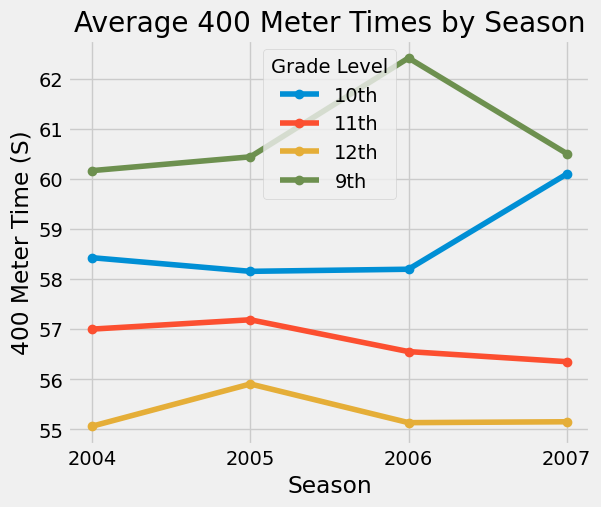

In [32]:
pivot_plot_season(group_400m, 'Season', 'Grade Level', '400 Meters', '400 Meter')

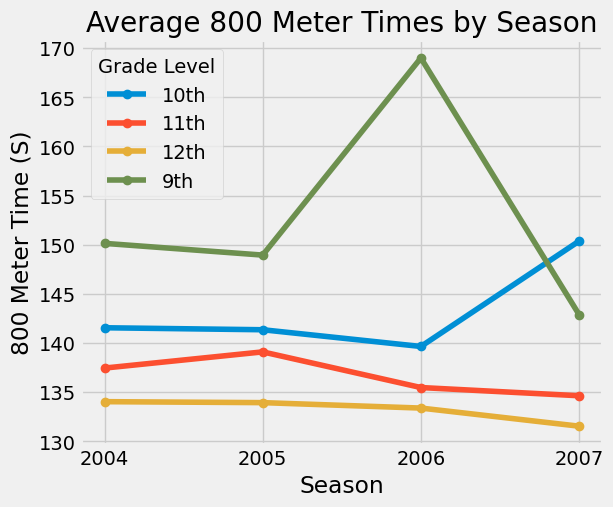

In [33]:
pivot_plot_season(group_800m, 'Season', 'Grade Level', '800 Meters', '800 Meter')

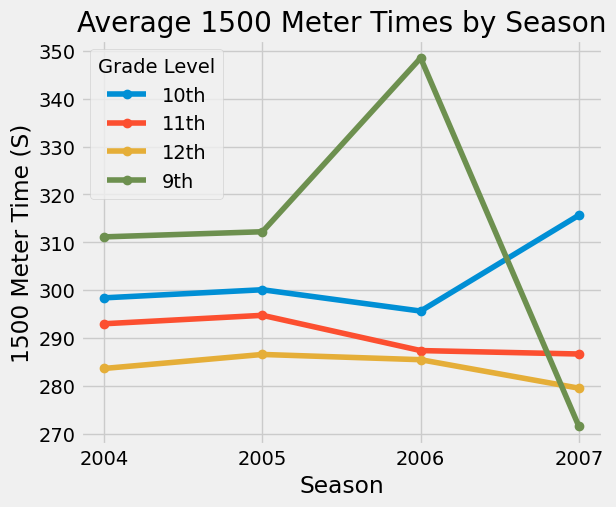

In [34]:
pivot_plot_season(group_1500m, 'Season', 'Grade Level', '1500 Meters', '1500 Meter')

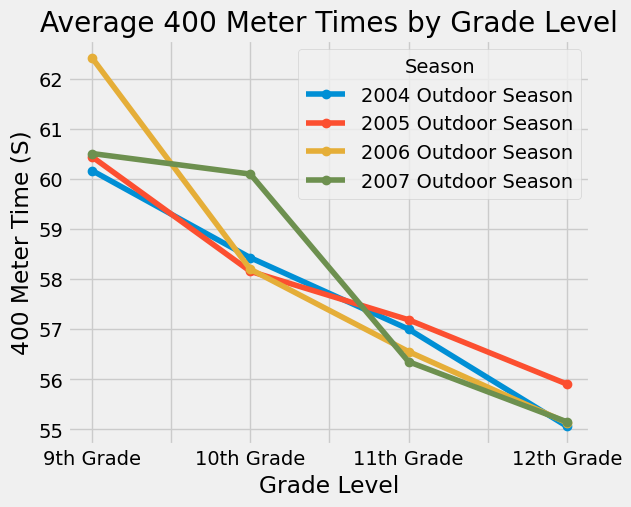

In [28]:
pivot_plot_grade(group_400m, 'Grade Level', 'Season', '400 Meters', '400 Meter')

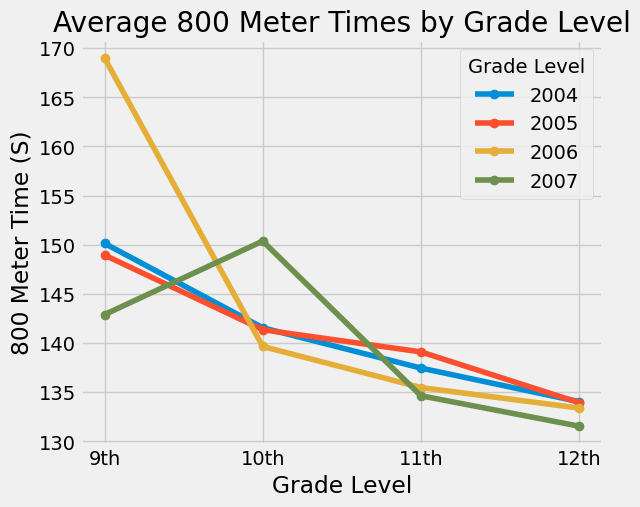

In [35]:
pivot_plot_grade(group_800m, 'Grade Level', 'Season', '800 Meters', '800 Meter')

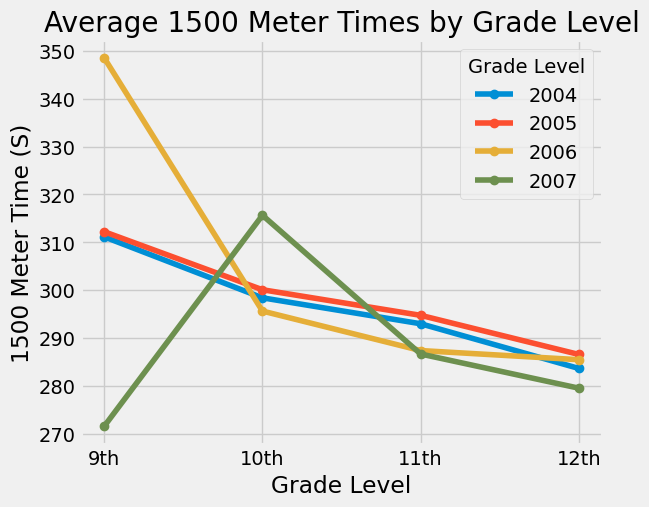

In [36]:
pivot_plot_grade(group_1500m, 'Grade Level', 'Season', '1500 Meters', '1500 Meter')

When looking at the mean times per grade level/season we can see that for each of these years, the trend is the same. The mean times are consistenly increasing by grade level. This is what we would expect based on an increase in age, maturity, and likely training.

Now, when we group and sort by grade level we see that for the years 2004- 2007 there is not much increase as the seasons increase. This shows us that the runners times have a high correlatation with grade level. This makes it easier to assume that athletes in 9th grade will likely run 60.x, etc. 

In [57]:
unique_pop400m = number_runners(df_4, 'Season', 'ID Number')
unique_pop800m = number_runners(df_8, 'Season', 'ID Number')
unique_pop1500m = number_runners(df_15, 'Season', 'ID Number')

print(unique_pop400m)
print('\n -------------------------------- \n')
print(unique_pop800m)
print('\n -------------------------------- \n')
print(unique_pop1500m)


Season
2004 Outdoor Season     952
2005 Outdoor Season    1351
2006 Outdoor Season     882
2007 Outdoor Season     544
Name: ID Number, dtype: int64

 -------------------------------- 

Season
2004 Outdoor Season     891
2005 Outdoor Season    1245
2006 Outdoor Season     739
2007 Outdoor Season     420
Name: ID Number, dtype: int64

 -------------------------------- 

Season
2004 Outdoor Season     929
2005 Outdoor Season    1326
2006 Outdoor Season     765
2007 Outdoor Season     400
Name: ID Number, dtype: int64


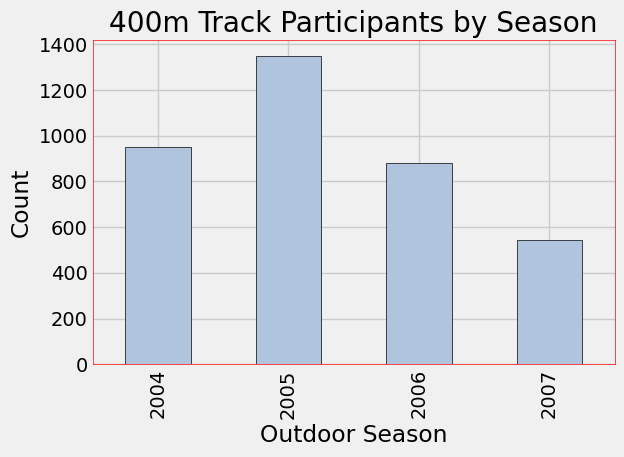

In [64]:
plt.rc('axes',edgecolor='r',linewidth=0.5)

plot_pop(unique_pop400m, 'Season', '400m')
plot_pop(unique_pop800m, 'Season', '800m')
plot_pop(unique_pop1500m, 'Season', '1500m')

To answer the population question. I want to know if our sport has been growing as time goes on. This question is hard to answer because of the sparse data. We can see that for the 2004 and 2005 season, there is a clear increase in athletes/season. This shows big growth. For the 2006 season, we can see that the 9th graders are amost absent from the dataset, but the 10th- 12th graders are a little lower than the previous year. The 2007 year is missing most runners in their 9th and 10th grade year. The 11th and 12th graders are between the count from 2004 and 2005.